In [1]:
#load needed libraries into the workspace
library(ggplot2)
library(RWeka)
library(mice)
library(Hmisc)
library(VIM)
library(ggplot2)
library(dplyr)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# read data attributes
data_head = read.csv("attributes.csv", sep = ",", header = TRUE)
data_head

Attributes
<chr>
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang


In [3]:
#Download heart disease dataset (hungarian data) from UCI and saved locally. 
url_data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
dest_file <- "~/Desktop/git_repo/BigDataGenemedicine/Biomedical-Data-preprocessing/data.csv"
download.file(url_data, dest_file)

In [4]:
# read dowloaded data set
data_set <- read.csv("data.csv", sep = ",", header = FALSE, col.name = c(data_head$Attributes)) %>%
    dplyr::rename(chest_pain = cp, num_in_perc = num) # rename some columns for clearity
head(data_set)

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_in_perc
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
1,28,1,2,130,132,0,2,185,0,0,?,?,?,0
2,29,1,2,120,243,0,0,160,0,0,?,?,?,0
3,29,1,2,140,?,0,0,170,0,0,?,?,?,0
4,30,0,1,170,237,0,1,170,0,0,?,?,6,0
5,31,0,2,100,219,0,1,150,0,0,?,?,?,0
6,32,0,2,105,198,0,0,165,0,0,?,?,?,0


In [5]:
#Some variables are not of the right data types. As a result, convert them to the right data type.
data_set[, 4:14] <- sapply(data_set[, 4:14],as.numeric)

head(data_set)

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”


,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_in_perc
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
2,29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
3,29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
4,30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
5,31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
6,32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0


In [6]:
# Replacing some values in data set
data_set$sex[data_set$sex == 0] <- "female"
data_set$sex[data_set$sex == 1] <- "male"

data_set$chest_pain[data_set$chest_pain == 1] <- "typical angina"
data_set$chest_pain[data_set$chest_pain == 2] <- "atypical angina"
data_set$chest_pain[data_set$chest_pain == 3] <- "non-angina pain"
data_set$chest_pain[data_set$chest_pain == 4] <- "asymptomatic"

data_set$fbs[data_set$fbs == 1] <- "T"
data_set$fbs[data_set$fbs == 0] <- "F"

data_set$restecg[data_set$restecg == 0] <- "normal"
data_set$restecg[data_set$restecg == 1] <- "st_t_wave_abnormality"
data_set$restecg[data_set$restecg == 2] <- "left_vent_hypertrophy"

data_set$exang[data_set$exang == 1] <- "yes"
data_set$exang[data_set$exang == 0] <- "no"

data_set$thal[data_set$thal == 3] <- "normal"
data_set$thal[data_set$thal == 6] <- "fixed_defect"
data_set$thal[data_set$thal == 7] <- "reversable_defect"

data_set$num_in_perc[data_set$num_in_perc < 0] <- "'< 50'"
data_set$num_in_perc[data_set$num_in_perc == 1] <- "'> 50'"




#data_set[data_set[,] == "?"] <- "NA" # replace ? with NA

head(data_set)

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_in_perc
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,28,male,atypical angina,130,132,F,left_vent_hypertrophy,185,no,0,NA,NA,NA,0
2,29,male,atypical angina,120,243,F,normal,160,no,0,NA,NA,NA,0
3,29,male,atypical angina,140,NA,F,normal,170,no,0,NA,NA,NA,0
4,30,female,typical angina,170,237,F,st_t_wave_abnormality,170,no,0,NA,NA,fixed_defect,0
5,31,female,atypical angina,100,219,F,st_t_wave_abnormality,150,no,0,NA,NA,NA,0
6,32,female,atypical angina,105,198,F,normal,165,no,0,NA,NA,NA,0


# Exploratory Data Analysis

In [7]:
# print out number of rows and column
paste0("number of rows are : ", nrow(data_set)) # number of rwos
paste0("number of rows columns are : ",ncol(data_set)) # number of columns

[1] "number of rows are : 294"

[1] "number of rows columns are : 14"

In [8]:
# statistics
summary(data_set) # descriptive statistics

      age            sex             chest_pain           trestbps    
 Min.   :28.00   Length:294         Length:294         Min.   : 92.0  
 1st Qu.:42.00   Class :character   Class :character   1st Qu.:120.0  
 Median :49.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :47.83                                         Mean   :132.6  
 3rd Qu.:54.00                                         3rd Qu.:140.0  
 Max.   :66.00                                         Max.   :200.0  
                                                       NA's   :1      
      chol           fbs              restecg             thalach     
 Min.   : 85.0   Length:294         Length:294         Min.   : 82.0  
 1st Qu.:209.0   Class :character   Class :character   1st Qu.:122.0  
 Median :243.0   Mode  :character   Mode  :character   Median :140.0  
 Mean   :250.8                                         Mean   :139.1  
 3rd Qu.:282.5                                         3rd Qu.:155.0  
 Max. 

## data_set contains some missing values. To get overview of these missing values, use functions from mice and VIM packages

,age,sex,chest_pain,oldpeak,num_in_perc,trestbps,restecg,thalach,exang,fbs,chol,slope,thal,ca,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
85,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
15,1,1,1,1,1,1,1,1,1,1,1,0,1,0,2
1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,2
150,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
5,1,1,1,1,1,1,1,1,1,1,0,1,0,0,3
1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,3
1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,3
16,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4


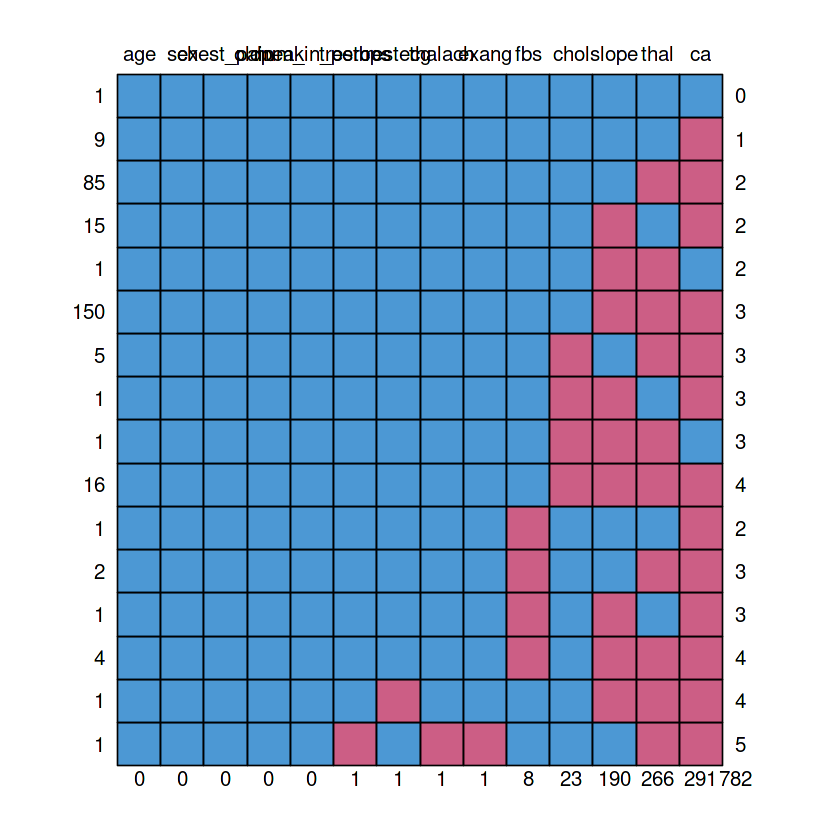

In [9]:
#'md.pattern', a function from mice package displays a table of the number of missing values for each column. It also provides how many 
#rows have this number of missing values (left column)

md.pattern(data_set)


 Variables sorted by number of missings: 
    Variable       Count
          ca 0.989795918
        thal 0.904761905
       slope 0.646258503
        chol 0.078231293
         fbs 0.027210884
    trestbps 0.003401361
     restecg 0.003401361
     thalach 0.003401361
       exang 0.003401361
         age 0.000000000
         sex 0.000000000
  chest_pain 0.000000000
     oldpeak 0.000000000
 num_in_perc 0.000000000


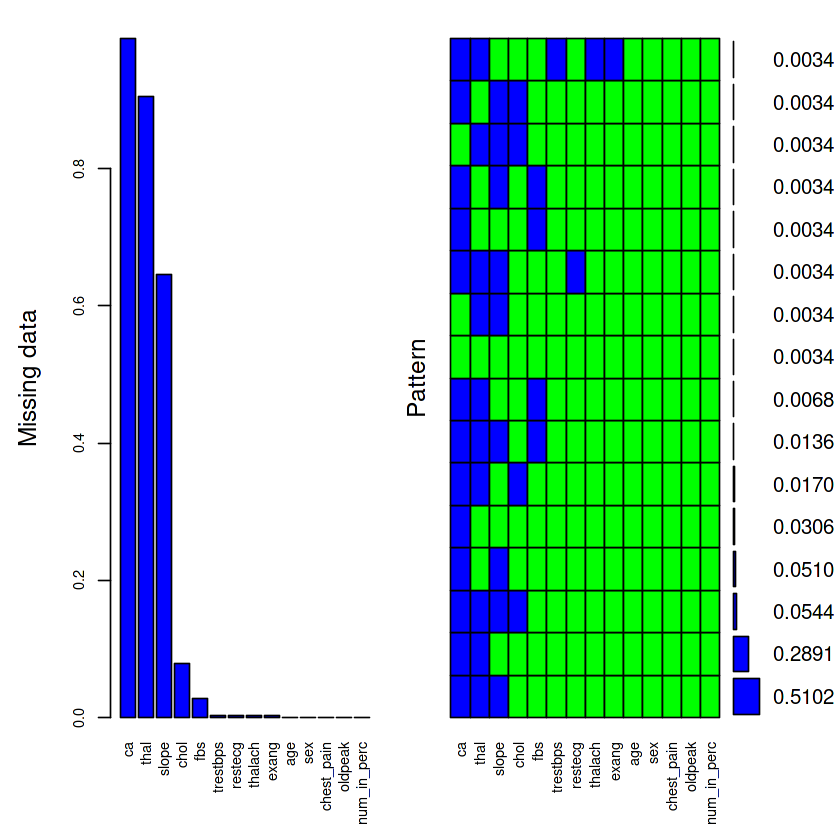

In [10]:
# From VIM package aggeage function helps rank the variables in decreasing order of missing values. 
# e.g variable ca has the highest amount of missing values.
mice_plot <- aggr(data_set, col=c("green","blue"),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(data_set), cex.axis=.7,
                    gap=3, ylab=c("Missing data","Pattern")) # (VIM) display graphically missing values

### There are diffrent ways of handling mssing values. One way is to impute these values, for example with the mean.

In [11]:
# imput the 'trestbps' missing values with mean and copy into new variable called 'trestbps_imputed'
data_set[,"trestbps_imputed"] <- with(data_set, impute(trestbps, mean))  # (Hmisc) impute with mean
summary(data_set)


 1 values imputed to 132.5836 



      age            sex             chest_pain           trestbps    
 Min.   :28.00   Length:294         Length:294         Min.   : 92.0  
 1st Qu.:42.00   Class :character   Class :character   1st Qu.:120.0  
 Median :49.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :47.83                                         Mean   :132.6  
 3rd Qu.:54.00                                         3rd Qu.:140.0  
 Max.   :66.00                                         Max.   :200.0  
                                                       NA's   :1      
      chol           fbs              restecg             thalach     
 Min.   : 85.0   Length:294         Length:294         Min.   : 82.0  
 1st Qu.:209.0   Class :character   Class :character   1st Qu.:122.0  
 Median :243.0   Mode  :character   Mode  :character   Median :140.0  
 Mean   :250.8                                         Mean   :139.1  
 3rd Qu.:282.5                                         3rd Qu.:155.0  
 Max. 


 Variables sorted by number of missings: 
         Variable       Count
               ca 0.989795918
             thal 0.904761905
            slope 0.646258503
             chol 0.078231293
              fbs 0.027210884
         trestbps 0.003401361
          restecg 0.003401361
          thalach 0.003401361
            exang 0.003401361
              age 0.000000000
              sex 0.000000000
       chest_pain 0.000000000
          oldpeak 0.000000000
      num_in_perc 0.000000000
 trestbps_imputed 0.000000000


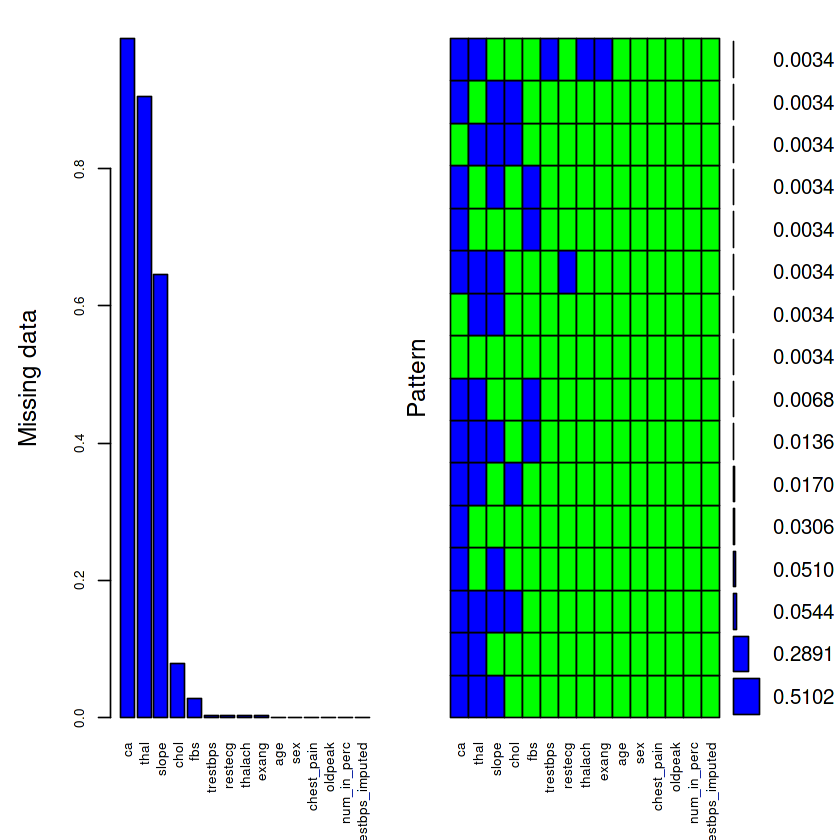

In [12]:
# Notice that there no more missing value in 'trestbps_imputed' as compared to 'trestbps'
mice_plot <- aggr(data_set, col=c("green","blue"),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(data_set), cex.axis=.65,
                    gap=3, ylab=c("Missing data","Pattern")) # (VIM) display graphically missing values